In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Importando a base
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vendas_loja_seminovos.csv', sep=';')

# Para ver as primeiras linhas do DataFrame
print(df.head())

   ID         Nome Completo  Idade             CPF       Sexo Estado Civil  \
0   1           Luigi Silva     53  910.623.485-24  Masculino        Viúvo   
1   2        Ester da Rocha     63  235.408.196-06   Feminino     Solteiro   
2   3  Maria Luiza Nogueira     25  174.950.328-04   Feminino     Solteiro   
3   4          Renan Novaes     19  245.367.890-65  Masculino       Casado   
4   5        Manuela Novais     40  371.269.084-31   Feminino       Casado   

                         E-mail             Telefone              Cidade  \
0  monteirovalentim@example.org     +55 21 0592 1284  Azevedo de da Rosa   
1       santoshenry@example.net      (084) 2407 2800             Costela   
2        zgoncalves@example.net     +55 81 2567 8847           Sá Alegre   
3          oliver50@example.com  +55 (021) 0411 4291              Guerra   
4            tpinto@example.org      (011) 8890 3785     Castro de Minas   

  Estado    Marca    Modelo  Ano_fabricacao    Cor  Valor_venda  Data_vend

In [64]:
# Padronizar os dados

# Dicionário para mapeamento
mapeamento_genero = {'Masculino': 1, 'Feminino': 0}

# Aplicando o mapeamento na coluna 'genero'
df['genero_codificado'] = df['Sexo'].map(mapeamento_genero)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Idade', 'Ano_fabricacao', 'Valor_venda']])

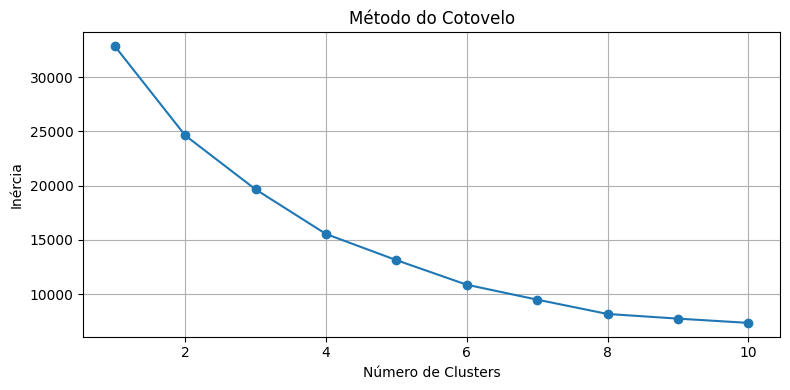

In [65]:
# Encontrar número ideal de clusters (método do cotovelo)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.grid(True)
plt.tight_layout()
plt.savefig('metodo_cotovelo.png')

In [66]:
# Aplicar K-Means com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

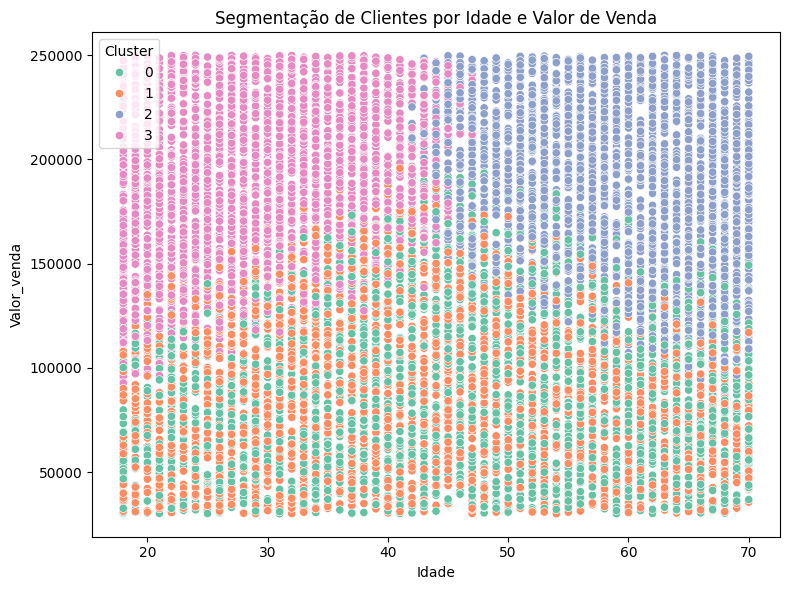

In [68]:
# Visualizar os clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Idade', y='Valor_venda', hue='Cluster', palette='Set2')
plt.title('Segmentação de Clientes por Idade e Valor de Venda')
plt.tight_layout()
plt.savefig('segmentacao_clientes.png')

In [56]:
# Mostrar os perfis dos clusters
cluster_summary = df.groupby('Cluster')[['Idade', 'genero_codificado', 'Ano_fabricacao', 'Valor_venda']].mean().round(1)
#cluster_summary = df.groupby('Cluster').mean().round(1)
print("Resumo dos Clusters:\n")
display(cluster_summary)

Resumo dos Clusters:



,Idade,genero_codificado,Ano_fabricacao,Valor_venda
Cluster,,,,
0,43.1,0.0,2015.3,140723.2
1,45.6,0.0,2020.7,140892.7
2,45.0,1.0,2015.3,140143.6
3,42.7,1.0,2020.7,141586.1


## O que este código faz?

1. Importa a base em que vamos trabalhar
2. Normaliza os dados para evitar distorções.
3. Determina o número ideal de clusters usando o método do cotovelo.
4. Aplica K-Means para segmentar os clientes.
5. Cria visualizações para entender os grupos.
6. Exibe um resumo dos clusters com médias das variáveis.